## Definición de la Target
*Your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly*

In [159]:
ruta_abs = r'./data/train.csv'

## TO DOs

* Llevarnos el Age a la media, dependiendo de como se distribuya la variable
* Terminar el análisis del resto de variables
* Elaborar un modelo BenchaMark

## Librerías
En la celda abajo indicada se mostrarám todas las librerías empleadas durante el proceso.

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [161]:
df = pd.read_csv(ruta_abs,dtype={"Age":"Int64"})

In [162]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age               Int64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [163]:
print(15*"-","Columnas del DataFrame de train:",15*"-")
col_names = df.columns
print(col_names)

print(15*"-","Chequeo duplicados:",15*"-")
print(df.duplicated().any())


print(15*"-","Número total de nulos:",15*"-")
df.isna().sum()

--------------- Columnas del DataFrame de train: ---------------
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')
--------------- Chequeo duplicados: ---------------
False
--------------- Número total de nulos: ---------------


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

De aqui se pueden obtener diferentes conclusiones, como se observa la fuente de datos no presenta ningún duplicado, sin embargo en cuanto a nulos se necesita una evaluación más exhaustiva, dado que la muesttra con la que se cuenta es solo de ocho mil IDs.

## Evaluacion de Nulos

In [164]:
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [165]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [166]:
def eval_Nan(df,col_eval,col_based):
    print(15*"-","{} NANs:".format(col_eval),15*"-")
    print(len(df[col_eval].unique()))
    print(df[col_eval].unique())
    print(df.groupby([col_eval],as_index=False,dropna=False).count().sort_values(["PassengerId"],ascending=False)[[col_eval,col_based]])
    print(df[col_eval].isna().sum())

def subs_max_size(df,col_name,var_name): 
     grouped = df.groupby([col_name],as_index=False).agg("size")
     if var_name==None:
        pass
     else:
        df[col_name].loc[df[col_name]==var_name]=grouped[col_name][0]
        
     df[col_name].loc[df[col_name].isna()==True]=grouped[col_name][0]

     return df

In [167]:
def var_status(df,col):

    if "PassengerId" in col:
        col.remove("PassengerId")
    else: pass

    for i in col:
        eval_Nan(df,i,"PassengerId")

In [168]:
var_status(df,list(col_names))

--------------- HomePlanet NANs: ---------------
4
['Europa' 'Earth' 'Mars' nan]
  HomePlanet  PassengerId
0      Earth         4602
1     Europa         2131
2       Mars         1759
3        NaN          201
201
--------------- CryoSleep NANs: ---------------
3
[False True nan]
  CryoSleep  PassengerId
0     False         5439
1      True         3037
2       NaN          217
217
--------------- Cabin NANs: ---------------
6561
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
         Cabin  PassengerId
6560       NaN          199
6156   G/734/S            8
654    C/137/S            7
1454    E/13/S            7
5092  G/1368/P            7
...        ...          ...
2822  F/1439/S            1
2821  F/1439/P            1
2819  F/1436/S            1
2818  F/1436/P            1
3280  F/1763/S            1

[6561 rows x 2 columns]
199
--------------- Destination NANs: ---------------
4
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
     Destination  PassengerId
2    T

Se procede variable por variable a ejecutar un tratamiento de los valores nulos y los atípicos.
Viendo esto, se desechan las siguientes variables por considerarse poco útiiles para el modelaje:
   
   * **Cabin**
   * **PassengerId**
   * **Name** -> En el caso de esta variable primero se retiraran todos los valores que son nulos

In [169]:
subs_max_size(df,col_name="HomePlanet",var_name="Europa")
subs_max_size(df,col_name="CryoSleep",var_name=None)
subs_max_size(df,col_name="Destination",var_name=None)
subs_max_size(df,col_name="VIP",var_name=None)
subs_max_size(df,col_name="ShoppingMall",var_name=None)
subs_max_size(df,col_name="Spa",var_name=None)
subs_max_size(df,col_name="VRDeck",var_name=None)
subs_max_size(df,col_name="RoomService",var_name=None)
subs_max_size(df,col_name="FoodCourt",var_name=None)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Earth,False,B/0/P,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Earth,False,A/0/S,TRAPPIST-1e,58,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Earth,False,A/0/S,TRAPPIST-1e,33,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Earth,False,A/98/P,55 Cancri e,41,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Earth,False,E/608/S,55 Cancri e,32,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [170]:
var_status(df,list(col_names))

--------------- HomePlanet NANs: ---------------
2
['Earth' 'Mars']
  HomePlanet  PassengerId
0      Earth         6934
1       Mars         1759
0
--------------- CryoSleep NANs: ---------------
2
[False True]
   CryoSleep  PassengerId
0      False         5656
1       True         3037
0
--------------- Cabin NANs: ---------------
6561
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
         Cabin  PassengerId
6560       NaN          199
6156   G/734/S            8
654    C/137/S            7
1454    E/13/S            7
5092  G/1368/P            7
...        ...          ...
2822  F/1439/S            1
2821  F/1439/P            1
2819  F/1436/S            1
2818  F/1436/P            1
3280  F/1763/S            1

[6561 rows x 2 columns]
199
--------------- Destination NANs: ---------------
3
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
     Destination  PassengerId
2    TRAPPIST-1e         5915
0    55 Cancri e         1982
1  PSO J318.5-22          796
0
-------------

In [171]:
df["Age_Group"] = pd.cut(df["Age"],4,labels=["Joven","Adulto","Edad Avanzada","Aciano"]).to_list()
dest_by_age = pd.crosstab(df["Destination"],df["Age_Group"],dropna=False)
dest_by_agpl = df.groupby(["Destination","Age_Group","HomePlanet"]).size().unstack(level=0,fill_value="Destination")

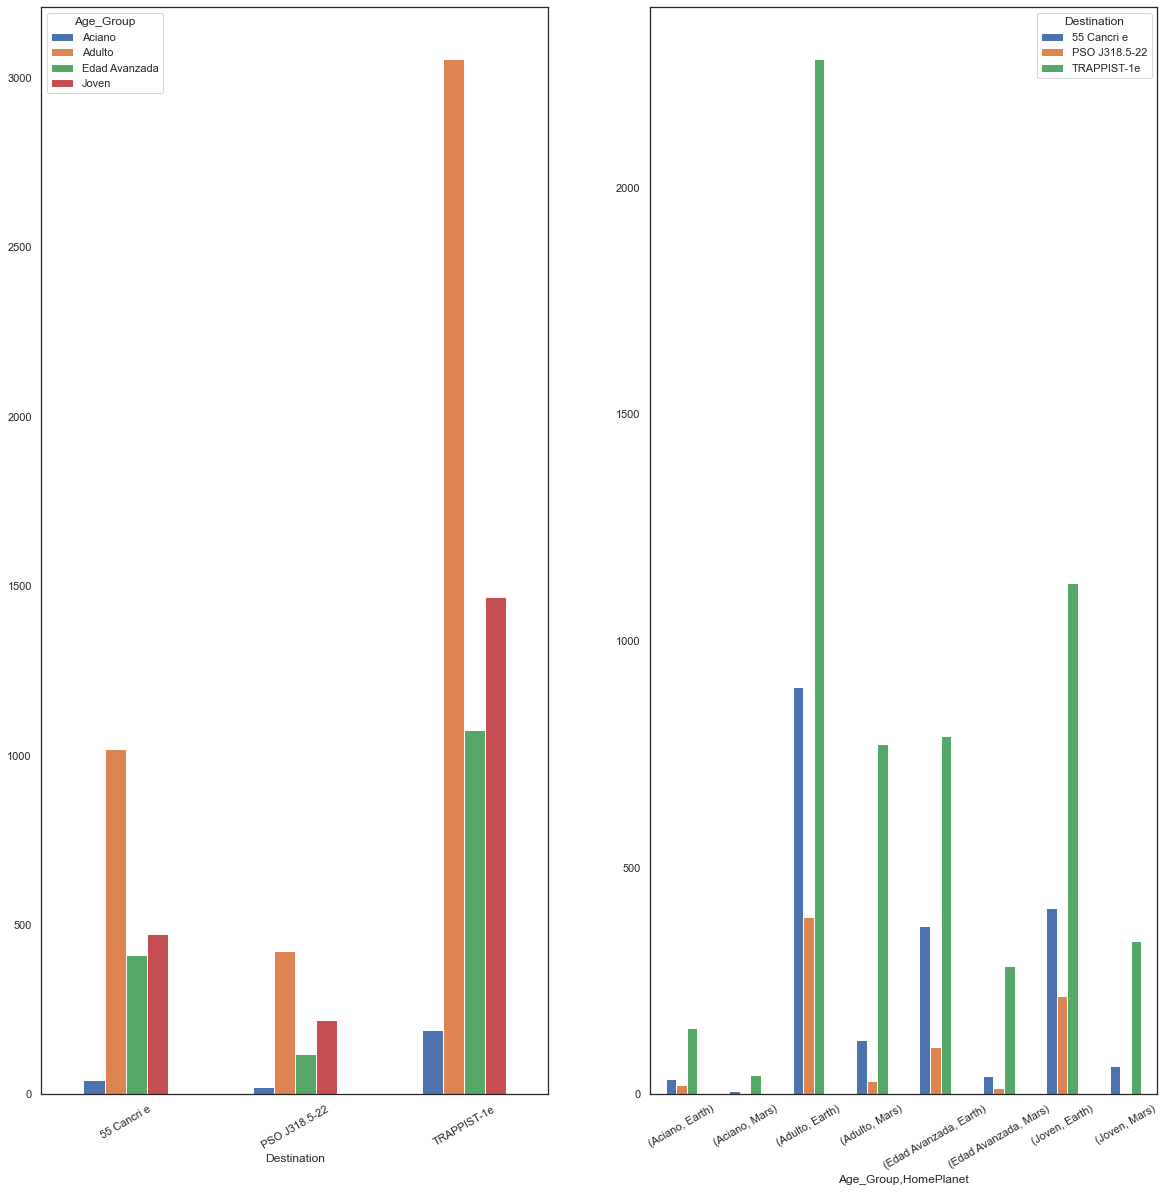

In [172]:
figure,ax = plt.subplots(1,2,figsize=(20,20))


dest_by_age.plot.bar(ax=ax[0],rot=30);
dest_by_agpl.plot.bar(ax=ax[1],rot=30);


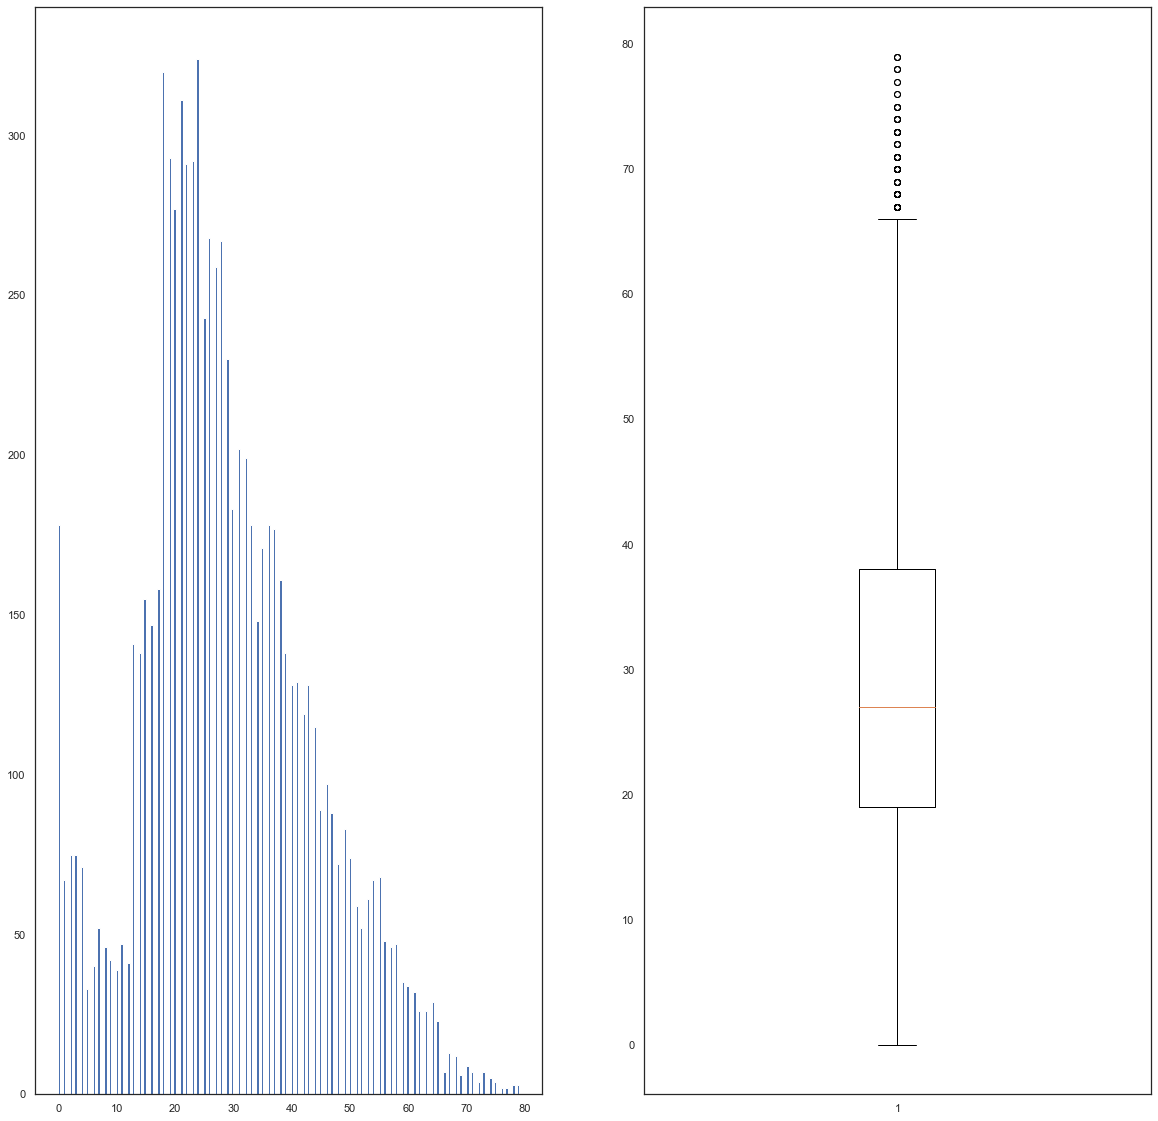

In [173]:
figure, ax = plt.subplots(1,2,figsize=(20,20))

bins_Age = df["Age"].dropna()

ax[0].hist(bins_Age,bins=200);
ax[1].boxplot(np.array(df["Age"].dropna()));


df = df.loc[df["Age"].isna()==False]
df["Age"].loc[df["Age"]>round(df["Age"].quantile(q=0.75)+1.5*(df["Age"].quantile(q=0.75)-df["Age"].quantile(q=0.25)))]=round(df["Age"].quantile(q=0.75)+1.5*(df["Age"].quantile(q=0.75)-df["Age"].quantile(q=0.25)))
df["Age_Group"] = pd.cut(df["Age"],4,labels=["Joven","Adulto","Edad Avanzada","Aciano"]).to_list()

In [174]:
df.shape

(8514, 15)

In [175]:
# fig, ax = plt.subplots(5,1,figsize=(30,30))
# # bill_Amount = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
# bill_Amount = ["RoomService"]
# # sns.histplot(df["RoomService"],linewidth=1,ax=ax[1])

# for i in range(len(bill_Amount)):
#      df_sns = df.loc[df[bill_Amount[i]]!=0]
#      sns.histplot(df_sns,ax=ax[i])
# #     df[bill_Amount[i]].loc[df[bill_Amount[i]]>round(df[bill_Amount[i]].quantile(q=0.75)+1.5*(df[bill_Amount[i]].quantile(q=0.75)-df[bill_Amount[i]].quantile(q=0.25)))]=round(df[bill_Amount[i]].quantile(q=0.75)+1.5*(df[bill_Amount[i]].quantile(q=0.75)-df[bill_Amount[i]].quantile(q=0.25)))
# #     sns.boxplot(df[bill_Amount[i]],orient='v',ax=ax[i])
# # # plt.show()
# # df_num_vars = np.array(df[bill_Amount])
# # df_num_vars
# # g = sns.FacetGrid(df_num_vars,col_wrap=4,sharex=False,sharey=False)

In [176]:
df.shape

(8514, 15)

In [177]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_Group
0,0001_01,Earth,False,B/0/P,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Edad Avanzada
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Adulto
2,0003_01,Earth,False,A/0/S,TRAPPIST-1e,58,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Aciano
3,0003_02,Earth,False,A/0/S,TRAPPIST-1e,33,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Adulto
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Joven
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Earth,False,A/98/P,55 Cancri e,41,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,Edad Avanzada
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,Adulto
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,Adulto
8691,9280_01,Earth,False,E/608/S,55 Cancri e,32,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,Adulto


In [178]:
df_grouped = pd.DataFrame(df.groupby(["Name"]).size().sort_values(ascending=False),columns=["Total_Nombres"])
df[df["Name"].isin(df_grouped[df_grouped["Total_Nombres"]>1].index)].sort_values(["Name"]).drop_duplicates(["Name"],keep="first")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_Group
7270,7775_01,Earth,False,C/253/P,55 Cancri e,28,False,7.0,489.0,0.0,4.0,6027.0,Alraium Disivering,False,Adulto
476,0512_02,Earth,True,D/18/S,TRAPPIST-1e,55,False,0.0,0.0,0.0,0.0,0.0,Ankalik Nateansive,True,Aciano
8488,9071_01,Earth,False,F/1855/P,55 Cancri e,22,False,0.0,0.0,1072.0,46.0,3.0,Anton Woody,False,Adulto
2559,2746_01,Mars,False,F/569/P,TRAPPIST-1e,52,False,758.0,0.0,356.0,5.0,0.0,Apix Wala,False,Aciano
7871,8398_01,Earth,True,B/329/S,TRAPPIST-1e,15,False,0.0,0.0,0.0,0.0,0.0,Asch Stradick,True,Joven
7862,8384_01,Earth,False,F/1722/P,TRAPPIST-1e,20,False,0.0,0.0,0.0,1535.0,0.0,Carry Contrevins,False,Adulto
6987,7429_01,Mars,False,NaN,TRAPPIST-1e,38,False,1126.0,0.0,23.0,34.0,0.0,Cuses Pread,False,Edad Avanzada
1795,1911_01,Earth,False,G/300/S,TRAPPIST-1e,46,False,8.0,652.0,0.0,5.0,90.0,Dia Cartez,False,Edad Avanzada
156,0179_01,Earth,False,G/26/P,TRAPPIST-1e,19,False,1.0,219.0,673.0,2.0,11.0,Elaney Webstephrey,True,Adulto
6702,7073_01,Earth,True,G/1161/S,TRAPPIST-1e,40,False,0.0,0.0,0.0,0.0,0.0,Glena Hahnstonsen,True,Edad Avanzada


In [179]:
df = df.loc[df["Name"].isna()==False]
df["RoomService"][df["RoomService"]>=2000]=2000
df["FoodCourt"].loc[df["FoodCourt"]>=6000]=6000
df["ShoppingMall"].loc[df["ShoppingMall"]>=6000]=6000
df["Spa"].loc[df["Spa"]>=5000]=5000
df["VRDeck"].loc[df["VRDeck"]>=2000]=2000

In [180]:
bill_Amount = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
for i in bill_Amount:
    df[i].loc[(df["CryoSleep"]==True) & df[i].isna()==True]
    df[i].loc[(df["CryoSleep"]==True) & df[i].isna()==True]=df[i].mean()

In [181]:
df.shape

(8317, 15)

In [182]:
var_status(df,list(col_names))

--------------- HomePlanet NANs: ---------------
2
['Earth' 'Mars']
  HomePlanet  PassengerId
0      Earth         6641
1       Mars         1676
0
--------------- CryoSleep NANs: ---------------
2
[False True]
   CryoSleep  PassengerId
0      False         5422
1       True         2895
0
--------------- Cabin NANs: ---------------
6331
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
         Cabin  PassengerId
6330       NaN          193
5941   G/734/S            8
5067  G/1476/S            7
746     C/21/P            7
4922  G/1368/P            7
...        ...          ...
2711   F/143/S            1
2710   F/143/P            1
2709  F/1429/S            1
2708  F/1428/P            1
3165  F/1756/S            1

[6331 rows x 2 columns]
193
--------------- Destination NANs: ---------------
3
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
     Destination  PassengerId
2    TRAPPIST-1e         5654
0    55 Cancri e         1898
1  PSO J318.5-22          765
0
-------------

In [183]:
df_2 = df.drop(columns=["Cabin","Name","PassengerId","Age_Group"])

In [184]:
df_2.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

## 2. Generación de la muestra de entrenamiento, validación, out-of-sample
En este apartado se va a proceder a generar la muestra de entrenamiento y validación dejando a parte una serie de valores para validar fuera de los valores de entrenamiento.

### Librerías

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler


In [186]:
df_2["services"]=df_2.RoomService + df_2.FoodCourt + df_2.ShoppingMall+df_2.Spa + df_2.VRDeck

In [187]:
bill_Amount_2 = bill_Amount.copy()
bill_Amount_2.append("services")

In [188]:
minMax_Scaler = MinMaxScaler()
for i in bill_Amount_2:
    df_2[i]=minMax_Scaler.fit_transform(np.array(df_2[i]).reshape(-1,1))

In [189]:
def L_Encod(df,col_names):
    L_Encoder = LabelEncoder()
    for i in col_names:
        x = L_Encoder.fit_transform(np.array(df[i]))
        df[i]=x
    return df

In [190]:
cat_vars = [name for name,i in zip(df_2.columns,df_2.dtypes) if i in ["object","bool"]]
df_3= L_Encod(df_2,cat_vars)
# df_3 = df_3.drop(columns=["FoodCourt","Spa","VRDeck","HomePlanet","Destination"])
# df_3 = df_3.drop(columns=["services"])

## Modelado

In [191]:
df_3.head(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,services
0,0,0,2,39,0,0.0000,0.0000,0.000000,0.0000,0.000,0,0.000000
1,0,0,2,24,0,0.0545,0.0015,0.004167,0.1098,0.022,1,0.052377


<AxesSubplot:>

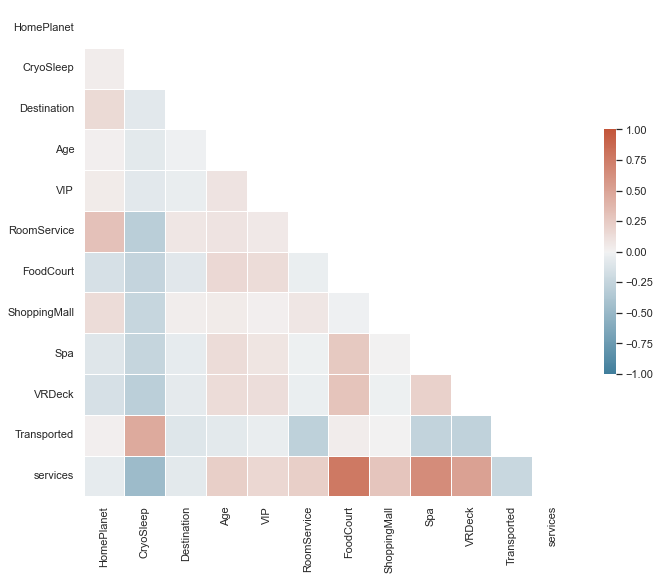

In [192]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df_3.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [193]:
df_3 = df_3[["CryoSleep","RoomService","Spa","VRDeck","Age","Transported"]]

In [194]:
df_3

,CryoSleep,RoomService,Spa,VRDeck,Age,Transported
0,0,0.0000,0.0000,0.0000,39,0
1,0,0.0545,0.1098,0.0220,24,1
2,0,0.0215,1.0000,0.0245,58,0
3,0,0.0000,0.6658,0.0965,33,0
4,0,0.1515,0.1130,0.0010,16,1
...,...,...,...,...,...,...
8688,0,0.0000,0.3286,0.0370,41,0
8689,1,0.0000,0.0000,0.0000,18,0
8690,0,0.0000,0.0002,0.0000,26,1
8691,0,0.0000,0.0706,1.0000,32,0


In [195]:
X = df_3.drop(columns=["Transported"])
Y = df_3["Transported"]
X_train,X_V_T,Y_train,Y_V_T = train_test_split(X,Y,test_size=0.3,train_size=0.7,random_state=11)
X_valid,X_test,Y_valid,Y_test = train_test_split(X_V_T,Y_V_T,test_size=0.4,train_size=0.6,random_state=11)

In [197]:
import optuna 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score

def objetive_factory(X_train,Y_train,X_valid,Y_valid):

    def objective(trial):

        class_m = trial.suggest_categorical('classifier',["Ada","random"])

        if class_m=='Ada':
            param = {"learning_rate":trial.suggest_float("learning_rate",0.01,1),
                    "algorithm":trial.suggest_categorical('algorithm',['SAMME','SAMME.R']),
                    "n_estimators":trial.suggest_int("n_estimators",1,100)}
                    #"random_state":trial.suggest_int("random_state",1,100)}
            clasfier = AdaBoostClassifier(**param)

        else:
            param = {"criterion": trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"]),
                    "n_estimators":trial.suggest_int("n_estimators",1,100),
                    "max_depth":trial.suggest_int("max_depth",1,100),
                    # "min_samples_unit":trial.suggest_float("min_samples_unit",1,100),
                    "max_leaf_nodes":trial.suggest_int("max_leaf_nodes",2,100),
                    "min_impurity_decrease":trial.suggest_float("min_impurity_decrease",1.0,100.0),
                    "ccp_alpha":trial.suggest_float("ccp_alpha",0.01,0.2)}
            clasfier = RandomForestClassifier(**param)
        # else:
        #     param = {"eta":trial.suggest_float("eta",0.01,1),
        #     "max_depth":trial.suggest_int("max_depth",1,100)
        #     }
        #     clasfier = xgb.XGBClassifier(**param)

        score = cross_val_score(clasfier,X_train,Y_train,n_jobs=-1,cv=3,scoring="accuracy")
        accuracy = score.mean()
        return accuracy
    return objective,study



if __name__=="__main__":
    study = optuna.create_study(direction="maximize")
    objective,study = objetive_factory(X_train,Y_train,X_valid,Y_valid)
    study.optimize(objective,n_trials=100)
    print(study.best_trial)

[I 2022-12-07 07:25:50,016] A new study created in memory with name: no-name-d8c53491-bd1e-4355-be19-6752aebc5fa2
[I 2022-12-07 07:25:50,307] Trial 0 finished with value: 0.7656782294172948 and parameters: {'classifier': 'Ada', 'learning_rate': 0.13183141523939937, 'algorithm': 'SAMME', 'n_estimators': 69}. Best is trial 0 with value: 0.7656782294172948.
[I 2022-12-07 07:25:50,484] Trial 1 finished with value: 0.5026627433692555 and parameters: {'classifier': 'random', 'criterion': 'entropy', 'n_estimators': 60, 'max_depth': 75, 'max_leaf_nodes': 12, 'min_impurity_decrease': 92.43296898948282, 'ccp_alpha': 0.07845943756955696}. Best is trial 0 with value: 0.7656782294172948.
[I 2022-12-07 07:25:50,908] Trial 2 finished with value: 0.7732364193891624 and parameters: {'classifier': 'Ada', 'learning_rate': 0.22370548969381474, 'algorithm': 'SAMME.R', 'n_estimators': 86}. Best is trial 2 with value: 0.7732364193891624.
[I 2022-12-07 07:25:51,016] Trial 3 finished with value: 0.502662743369

FrozenTrial(number=48, values=[0.7735795308685253], datetime_start=datetime.datetime(2022, 12, 7, 7, 26, 2, 228270), datetime_complete=datetime.datetime(2022, 12, 7, 7, 26, 2, 517530), params={'classifier': 'Ada', 'learning_rate': 0.267780241182008, 'algorithm': 'SAMME.R', 'n_estimators': 82}, distributions={'classifier': CategoricalDistribution(choices=('Ada', 'random')), 'learning_rate': FloatDistribution(high=1.0, log=False, low=0.01, step=None), 'algorithm': CategoricalDistribution(choices=('SAMME', 'SAMME.R')), 'n_estimators': IntDistribution(high=100, log=False, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=48, state=TrialState.COMPLETE, value=None)


In [153]:
ada_Params = study.best_params
del ada_Params["classifier"]

In [154]:
clasfier = AdaBoostClassifier(**ada_Params)

In [155]:
X_G_train = pd.concat([X_train,X_valid])
Y_G_train = pd.concat([Y_train,Y_valid])

clasfier.fit(X_G_train,Y_G_train)

AdaBoostClassifier(learning_rate=0.13604427631416388, n_estimators=41)

In [156]:
preds = clasfier.predict(X_test)

In [157]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test,preds)
acc

0.7517517517517518

## To Dos:

* Sacar información de la cabina
* Elaborar OneHot Encoding de las variables categóricas

## **PRUEBAS**

In [ ]:
# import optuna 
# from sklearn.ensemble import RandomForestClassifier

# def objetive_factory(X_train,Y_train,X_valid,Y_valid):

#     def objective(trial):

#         X_train,X_V_T,Y_train,Y_V_T = train_test_split(X,Y,test_size=0.3,train_size=0.7,random_state=11)
#         X_valid,X_test,Y_valid,Y_test = train_test_split(X_V_T,Y_V_T,test_size=0.4,train_size=0.6,random_state=11)
#         param = {"max_depth":trial.suggest_int("max_depth",2,100,log=True),
#                 # "criterion": trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"]),
#                 "n_estimators":trial.suggest_int("n_estimators",1,100),
#                 "bootstrap":trial.suggest_categorical("bootstrap",["True","False"]),
#                 "ccp_alpha":trial.suggest_float("ccp_alpha",0.01,0.2)}
#         rf_clas_2 = RandomForestClassifier(**param)
#         rf_clas_2.fit(X_train,Y_train)
#         preds_2 = rf_clas_2.predict(X_valid)
#         accuracy = accuracy_score(Y_valid,preds_2)

#         return accuracy
#     return objective,study

# objective,study = objetive_factory(X_train,Y_train,X_valid,Y_valid)
# study.optimize(objective,n_trials=10)